In [1]:
print("Deep Learning Assignment - Brice Baerga")

Deep Learning Assignment - Brice Baerga


In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
keras.__version__

'2.4.0'

In [4]:
rawData = pd.read_csv("Data.csv")

In [5]:
rawData.head()

,Health,Has_Knife,Has_Gun,Enemies,Wander,Hide,Attack,Run
0,2,0,0,0,1,0,0,0
1,2,0,0,1,1,0,0,0
2,2,0,1,1,0,0,1,0
3,2,0,1,2,0,0,1,0
4,2,1,0,2,0,1,0,0


In [6]:
rawData.describe()

,Health,Has_Knife,Has_Gun,Enemies,Wander,Hide,Attack,Run
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.000000,0.333333,0.333333,1.166667,0.222222,0.444444,0.222222,0.111111
std,0.840168,0.485071,0.485071,0.707107,0.427793,0.511310,0.427793,0.323381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


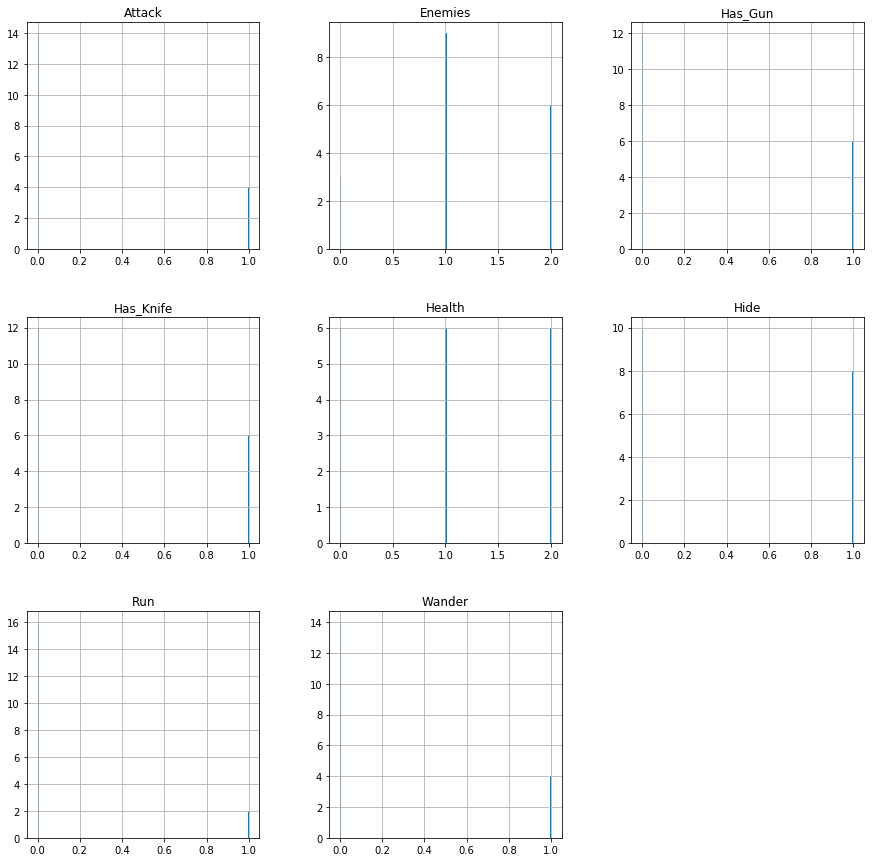

In [7]:
rawData.hist(bins = 200, figsize = (15,15))
plt.show()

Deep Learning Begins

In [8]:
inputs = rawData.drop(columns =["Wander", "Hide", "Attack", "Run"])

In [9]:
outputs = rawData.drop(columns = ["Health", "Has_Knife", "Has_Gun", "Enemies"])

In [10]:
inputs.head()

,Health,Has_Knife,Has_Gun,Enemies
0,2,0,0,0
1,2,0,0,1
2,2,0,1,1
3,2,0,1,2
4,2,1,0,2


In [11]:
outputs.head()

,Wander,Hide,Attack,Run
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [105]:
model = keras.Sequential()

In [106]:
##Input Layer##
model.add(keras.layers.Dense(4, activation = "relu", input_shape = (4,)))

In [107]:
##Hidden Layer 1##
model.add(keras.layers.Dense(90, activation = "relu"))

In [108]:
##Hidden Layer 2##
model.add(keras.layers.Dense(50, activation = "relu"))

In [109]:
##Output Layer##
model.add(keras.layers.Dense(4))

In [110]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [111]:
model.fit(inputs, outputs, epochs = 600, batch_size = 18)

Epoch 1/600
1/1 [==============================] - 0s 3ms/step - loss: 0.2055
Epoch 2/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1968
Epoch 3/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1899
Epoch 4/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1847
Epoch 5/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 6/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1783
Epoch 7/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1759
Epoch 8/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1738
Epoch 9/600
1/1 [==============================] - 0s 10ms/step - loss: 0.1717
Epoch 10/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1694
Epoch 11/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1670
Epoch 12/600
1/1 [==============================] - 0s 1ms/step - loss: 0.1647
Epoch 13/600
1/1 [==============================] - 0s 1ms/s

In [112]:
##First Test##
test1 = np.array([2,1,1,1])
v1 = np.array((model.predict(test1.reshape(1,4), batch_size = 4)))
print("[[Wander Hide Attack Run]]")
print(v1 >= .75)
print("The outcome should be Attack.")

[[Wander Hide Attack Run]]
[[False False  True False]]
The outcome should be Attack.


In [113]:
##Second Test##
test2 = np.array([1,1,1,2])
v2 = np.array((model.predict(test2.reshape(1,4), batch_size = 4)))
print("[[Wander Hide Attack Run]]")
print(v2 >= .75)
print("The outcome should be Hide.")

[[Wander Hide Attack Run]]
[[False  True False False]]
The outcome should be Hide.


In [114]:
##Third Test##
test3 = np.array([0,0,0,0])
v3 = np.array((model.predict(test3.reshape(1,4), batch_size = 4)))
print("[[Wander Hide Attack Run]]")
print(v3 >= .75)
print("The outcome should be Wander.")

[[Wander Hide Attack Run]]
[[ True False False False]]
The outcome should be Wander.


In [115]:
##Fourth Test##
test4 = np.array([0,1,1,1])
v4 = np.array((model.predict(test4.reshape(1,4), batch_size = 4)))
print("[[Wander Hide Attack Run]]")
print(v4 >= .75)
print("The outcome should be Hide.")

[[Wander Hide Attack Run]]
[[False  True False False]]
The outcome should be Hide.


In [116]:
##Fifth Test##
test5 = np.array([2,0,1,3])
v5 = np.array((model.predict(test5.reshape(1,4), batch_size = 4)))
print("[[Wander Hide Attack Run]]")
print(v5 >= .75)
print("The outcome should be Hide.")

[[Wander Hide Attack Run]]
[[False  True False False]]
The outcome should be Hide.


In [117]:
##Sixth Test##
test6 = np.array([2,1,0,3])
v6 = np.array((model.predict(test6.reshape(1,4), batch_size = 4)))
print("[[Wander Hide Attack Run]]")
print(v6 >= .75)
print("The outcome should be Hide.")

[[Wander Hide Attack Run]]
[[False  True False False]]
The outcome should be Hide.


In [120]:
##Seventh Test##
test7 = np.array([0,1,0,3])
v7 = np.array((model.predict(test7.reshape(1,4), batch_size = 4)))
print("[[Wander Hide Attack Run]]")
print(v7 >= .75)
print("The outcome should be Run.")

[[Wander Hide Attack Run]]
[[False False False  True]]
The outcome should be Run.
